# _____________________ Bankruptcy Project _____________________ 

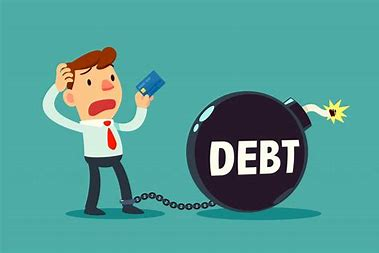


# Purpose

In conclusion, predicting bankruptcy is a very important task for many related financial institutions. Generally, the goal is to predict the likelihood that a company might go bankrupt. Financial institutions are in need of effective predictive models to make appropriate lending decisions.


## Summary Of Project

* The dataset contains 6,819 observations with 94 features.

* The target variable is " Bankrupt ", which is a binary variable indicating whether  the company might go bankrupt or not.

* The goal of the project is to develop a model to predict the likelihood that a company might go bankrupt and identify key factors contributing to bankruptcy.

* The project will involve exploratory data analysis, feature engineering, and building and evaluating machine learning models.

* Potential benefits of the project include reducing companies chances of getting bankrupt and cost savings for companies.


### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

### To display all Rows-Columns

In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',150000)
pd.set_option('display.width',500)

### Loading the Dataset

In [3]:
df=pd.read_csv('BANKRUPTCY PREDICTION .csv')

In [4]:
df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan �,Operating Profit Per Share (Yuan �,Per Share Net profit before tax (Yuan �,Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.7

### Shape

In [5]:
df.shape

(6819, 95)

### Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

**The above result tells us about the basic information of the components in the dataset.
In addition, the target column name has an excess of ? symbols, so this symbol needs to be removed for the appropriate column name.**

In [7]:
df.rename(columns={' Revenue Per Share (Yuan �':'Revenue Per Share(Euro)',' Operating Profit Per Share (Yuan �':' Operating Profit Per Share(Euro)',' Per Share Net profit before tax (Yuan �':' Per Share Net profit before tax(Euro)'},inplace=True)

### Summary

In [8]:
df.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share(Euro),Operating Profit Per Share(Euro),Per Share Net profit before tax(Euro),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0

From above we can find out


*   Min. value of most variable is 0 and max. value is 1.
*   we can conclude that all variables are scaled.
*   Similarly we can check for all the **minimum, maximum, mean, standard deviation, 25% , 50%, 75% values** of the all numerical columns.
*   It will help us to understand our data better.


### Duplicates

In [9]:
df.duplicated().sum()

0

* No Duplicates Values in Dataset

### Missing Values

In [10]:
df.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Value Per Share (B)                                    0
 Net Val

- No missing Values in dataset

### Distribution of Target Class

No. of Company Bankrupt= 220
No. of Company Not Bankrupt= 6599


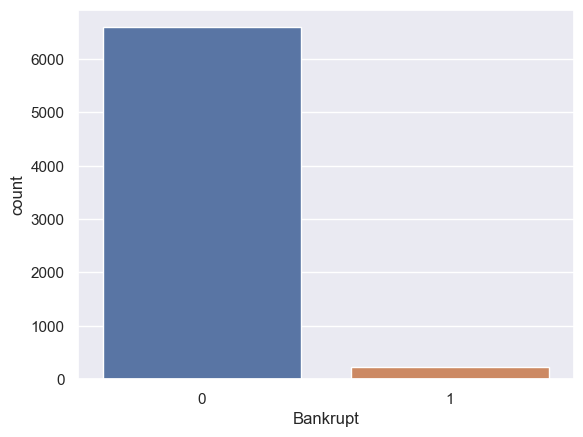

In [11]:
sns.countplot(data=df,x='Bankrupt')
A ,B=df['Bankrupt'].value_counts()
print('No. of Company Bankrupt=',B)
print('No. of Company Not Bankrupt=',A)
plt.show()

- As we can see the classes are highly uneven , data is  imbalanced.
- An imbalanced dataset often lead to biased prediction.
- Therefore, handling imbalanced data is crucial for fair model performance.

### Extracting Feature & Target

In [12]:
x=df.iloc[:,:-1]
y=df['Bankrupt']

## Feature Selection- mutual_info_classif

**Mutual Information** (MI) is a statistical measure that quantifies the dependency between two random variables. Specifically, it assesses how much information one variable provides about the other.
  -  **Definition**: Mutual information between two random variables is a non-negative value. It equals zero only if the two variables are independent. Higher values indicate stronger dependency.
  -  **Calculation:** MI can be estimated for a discrete target variable. It is commonly used in feature selection tasks. The function sklearn.feature_selection.mutual_info_classif in the scikit-learn library computes MI. It relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

In [13]:
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif
# to select the features
from sklearn.feature_selection import SelectKBest

In [14]:
mi = mutual_info_classif(x,y)
mi

array([0.03126193, 0.03737603, 0.0312895 , 0.01464426, 0.01309757,
       0.01707814, 0.03022544, 0.0296137 , 0.02699991, 0.0354481 ,
       0.        , 0.        , 0.0137584 , 0.00115688, 0.01967259,
       0.02971521, 0.03176539, 0.02918689, 0.04062251, 0.00790323,
       0.00340447, 0.0216621 , 0.03895164, 0.00925908, 0.0057908 ,
       0.01300317, 0.01217586, 0.0089096 , 0.01250247, 0.00290416,
       0.00967507, 0.00176614, 0.01113946, 0.00263526, 0.03470544,
       0.01076143, 0.03434372, 0.03439933, 0.01005491, 0.03926904,
       0.00183623, 0.02154939, 0.03981495, 0.00401476, 0.00427141,
       0.        , 0.        , 0.        , 0.00237041, 0.        ,
       0.0004727 , 0.01876316, 0.00644609, 0.02325853, 0.00489525,
       0.        , 0.01537257, 0.0033976 , 0.00559043, 0.01782184,
       0.01533912, 0.01945089, 0.        , 0.00149951, 0.01960609,
       0.02557814, 0.00231212, 0.03295965, 0.03082923, 0.00917291,
       0.00035271, 0.00350022, 0.0190161 , 0.00568461, 0.00387

Text(0, 0.5, 'Mutual Information')

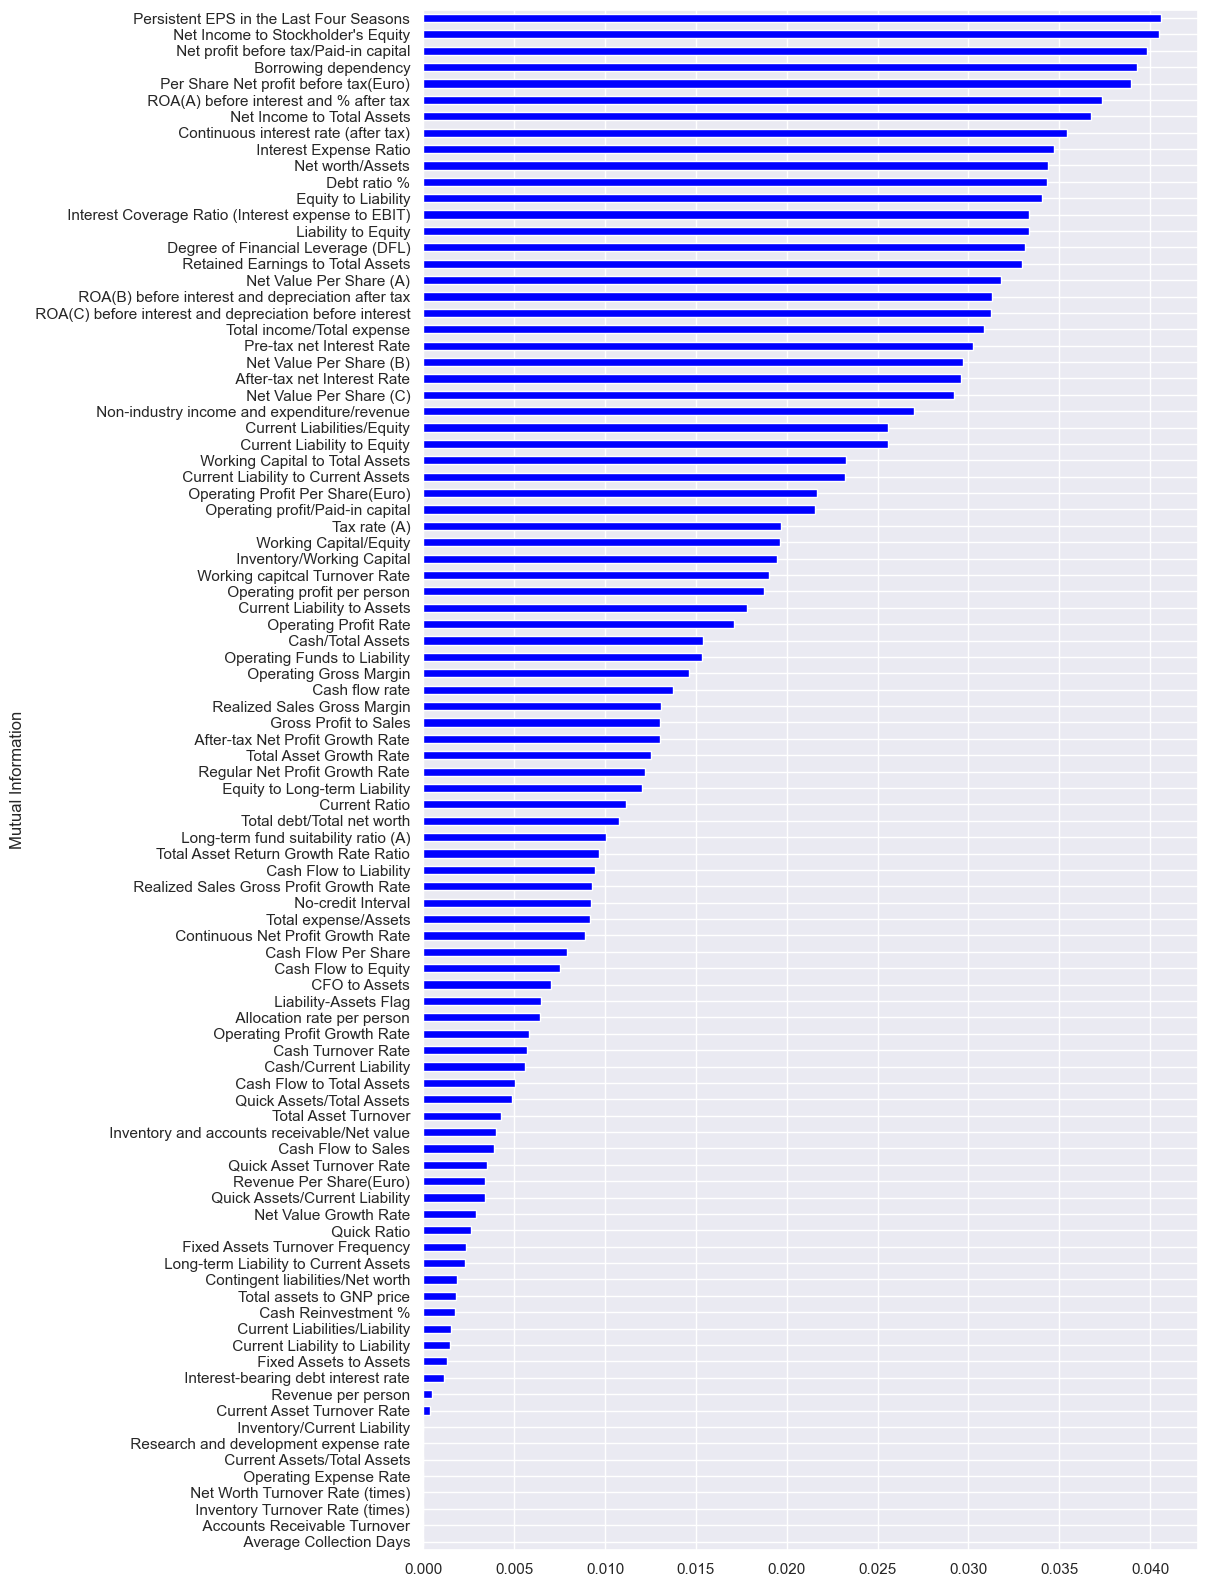

In [15]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = x.columns
mi.sort_values(ascending=True).plot.barh(figsize=(10, 20), color = 'blue')
plt.ylabel('Mutual Information')

In [16]:
# here we will select the top 15 features
# based on their mutual information value

# select features
top_features = SelectKBest(mutual_info_classif, k=15) 
sel_ = top_features.fit(x, y) 

# display features
print(x.columns[sel_.get_support()] )

Index([' ROA(A) before interest and % after tax', ' Continuous interest rate (after tax)', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax(Euro)', ' Interest Expense Ratio', ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets', ' Net Income to Stockholder's Equity', ' Liability to Equity', ' Degree of Financial Leverage (DFL)', ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability'],
      dtype='object')


### Visualization of features by Violinplot

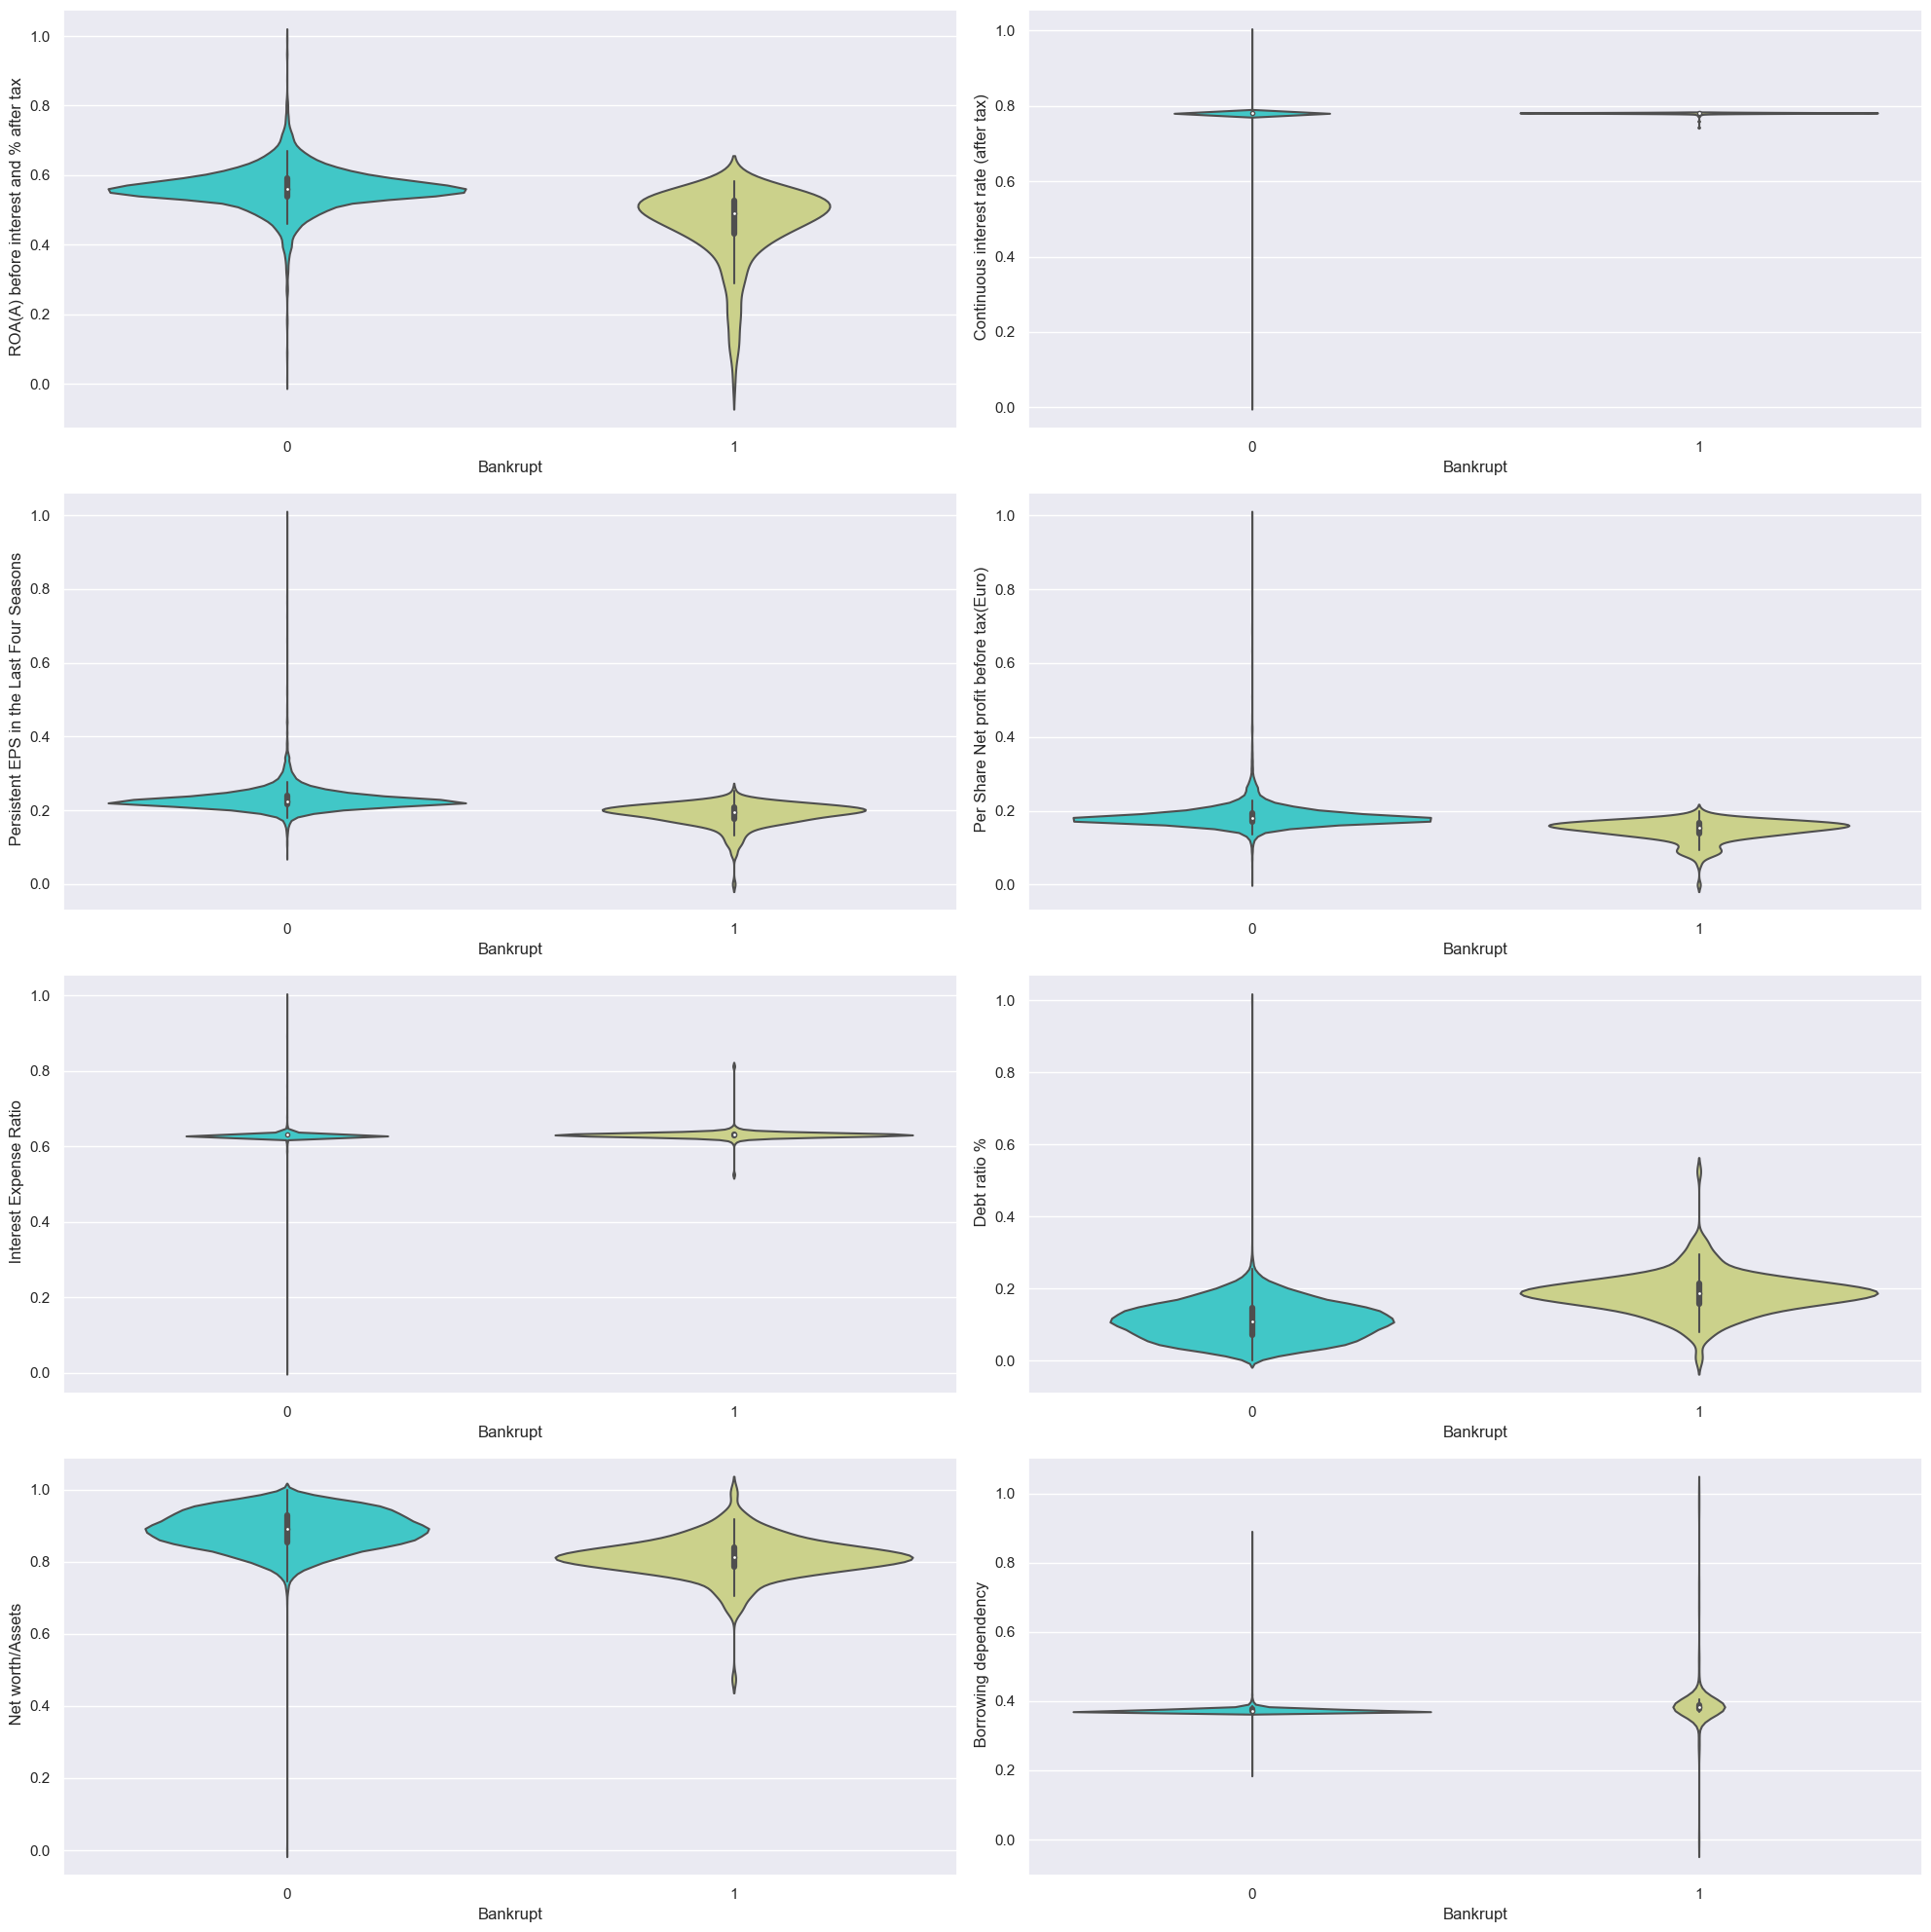

In [17]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

sns.violinplot(ax=axes[0, 0], data=df, y=' ROA(A) before interest and % after tax', x='Bankrupt', palette='rainbow',font_scale=25)
sns.violinplot(ax=axes[0, 1], data=df, y=' Continuous interest rate (after tax)', x='Bankrupt', palette='rainbow',font_scale=25)
sns.violinplot(ax=axes[1, 0], data=df, y=' Persistent EPS in the Last Four Seasons', x='Bankrupt', palette='rainbow',font_scale=25)
sns.violinplot(ax=axes[1, 1], data=df, y=' Per Share Net profit before tax(Euro)', x='Bankrupt', palette='rainbow',font_scale=25)
sns.violinplot(ax=axes[2, 0], data=df, y=' Interest Expense Ratio', x='Bankrupt', palette='rainbow',font_scale=25)
sns.violinplot(ax=axes[2, 1], data=df, y=' Debt ratio %', x='Bankrupt', palette='rainbow',font_scale=25)
sns.violinplot(ax=axes[3, 0], data=df, y=' Net worth/Assets', x='Bankrupt', palette='rainbow',font_scale=25)
sns.violinplot(ax=axes[3, 1], data=df, y=' Borrowing dependency', x='Bankrupt', palette='rainbow',font_scale=25)

plt.tight_layout()
plt.show()

### Relationship of Interest Expense Ratio & Debt ratio by Bankrupt

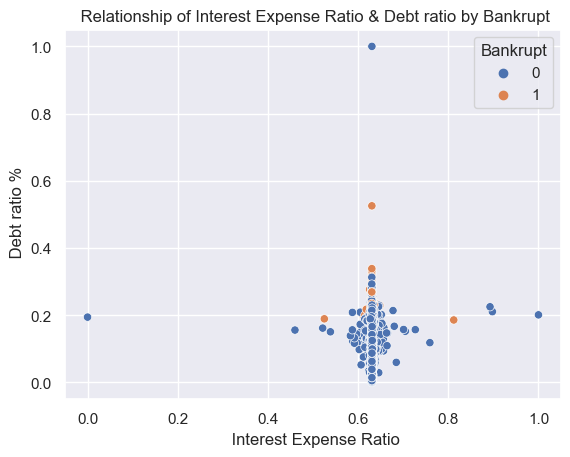

In [18]:
sns.scatterplot(data=df,x=' Interest Expense Ratio',y=' Debt ratio %',hue='Bankrupt')
plt.title(' Relationship of Interest Expense Ratio & Debt ratio by Bankrupt')
plt.show()

### Relationship of Equity to Liability & Liability to Equity by Bankrupt

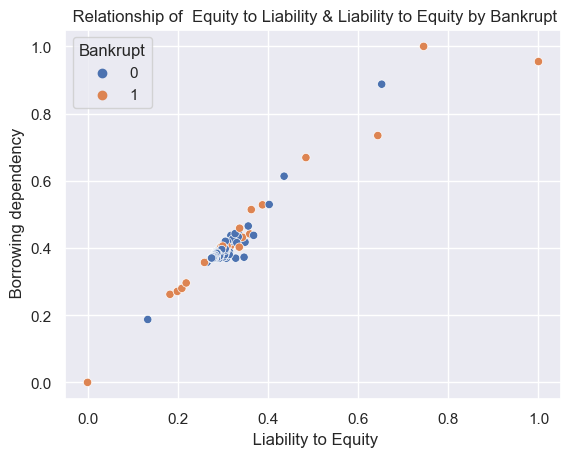

In [19]:
sns.scatterplot(data=df,x=' Liability to Equity',y=' Borrowing dependency',hue='Bankrupt')
plt.title(' Relationship of  Equity to Liability & Liability to Equity by Bankrupt')
plt.show()

### Relationship of Net Income to Total Assets & Net worth/Assets Bankrupt

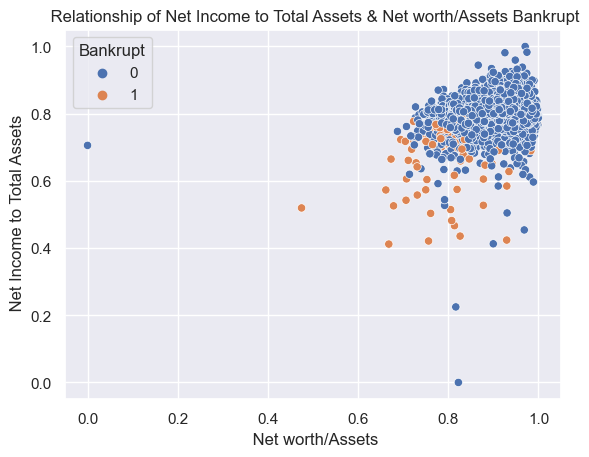

In [20]:
sns.scatterplot(data=df,x=' Net worth/Assets',y=' Net Income to Total Assets',hue='Bankrupt')
plt.title(' Relationship of Net Income to Total Assets & Net worth/Assets Bankrupt')
plt.show()

### Relationship of Continuous interest rate (after tax) & Borrowing dependency by Bankrupt

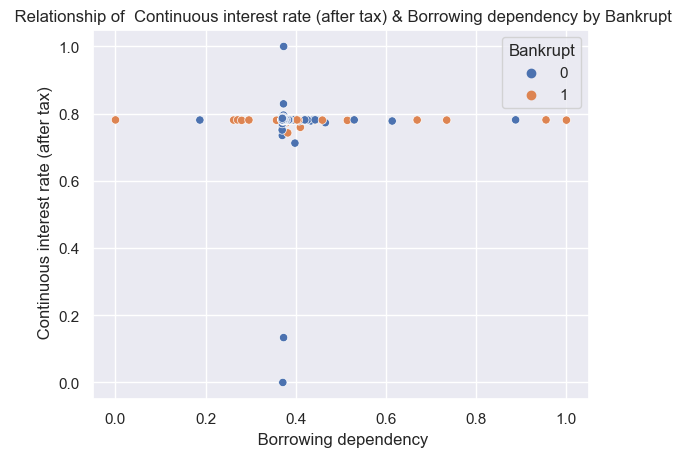

In [21]:
sns.scatterplot(data=df,x=' Borrowing dependency',y=' Continuous interest rate (after tax)',hue='Bankrupt')
plt.title(' Relationship of  Continuous interest rate (after tax) & Borrowing dependency by Bankrupt')
plt.show()

## Making New Dataset as df2 with top features 

In [22]:
df2=df[[' ROA(A) before interest and % after tax', ' Continuous interest rate (after tax)', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax(Euro)', ' Interest Expense Ratio', ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets', " Net Income to Stockholder's Equity", ' Liability to Equity', ' Degree of Financial Leverage (DFL)', ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability','Bankrupt']]

In [23]:
df2.shape

(6819, 16)

In [24]:
df2.head()

,ROA(A) before interest and % after tax,Continuous interest rate (after tax),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax(Euro),Interest Expense Ratio,Debt ratio %,Net worth/Assets,Borrowing dependency,Net profit before tax/Paid-in capital,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.424389,0.780985,0.169141,0.138736,0.629951,0.207576,0.792424,0.390284,0.137757,0.716845,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.538214,0.781506,0.208944,0.169918,0.635172,0.171176,0.828824,0.376760,0.168962,0.795297,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.499019,0.780284,0.180581,0.142803,0.629631,0.207516,0.792484,0.379093,0.148036,0.774670,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.451265,0.781241,0.193722,0.148603,0.630228,0.151465,0.848535,0.379743,0.147561,0.739555,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.538432,0.781550,0.212537,0.168412,0.636055,0.106509,0.893491,0.375025,0.167461,0.795016,0.839973,0.278514,0.024752,0.575617,0.035490,1


### Distribution Of Features

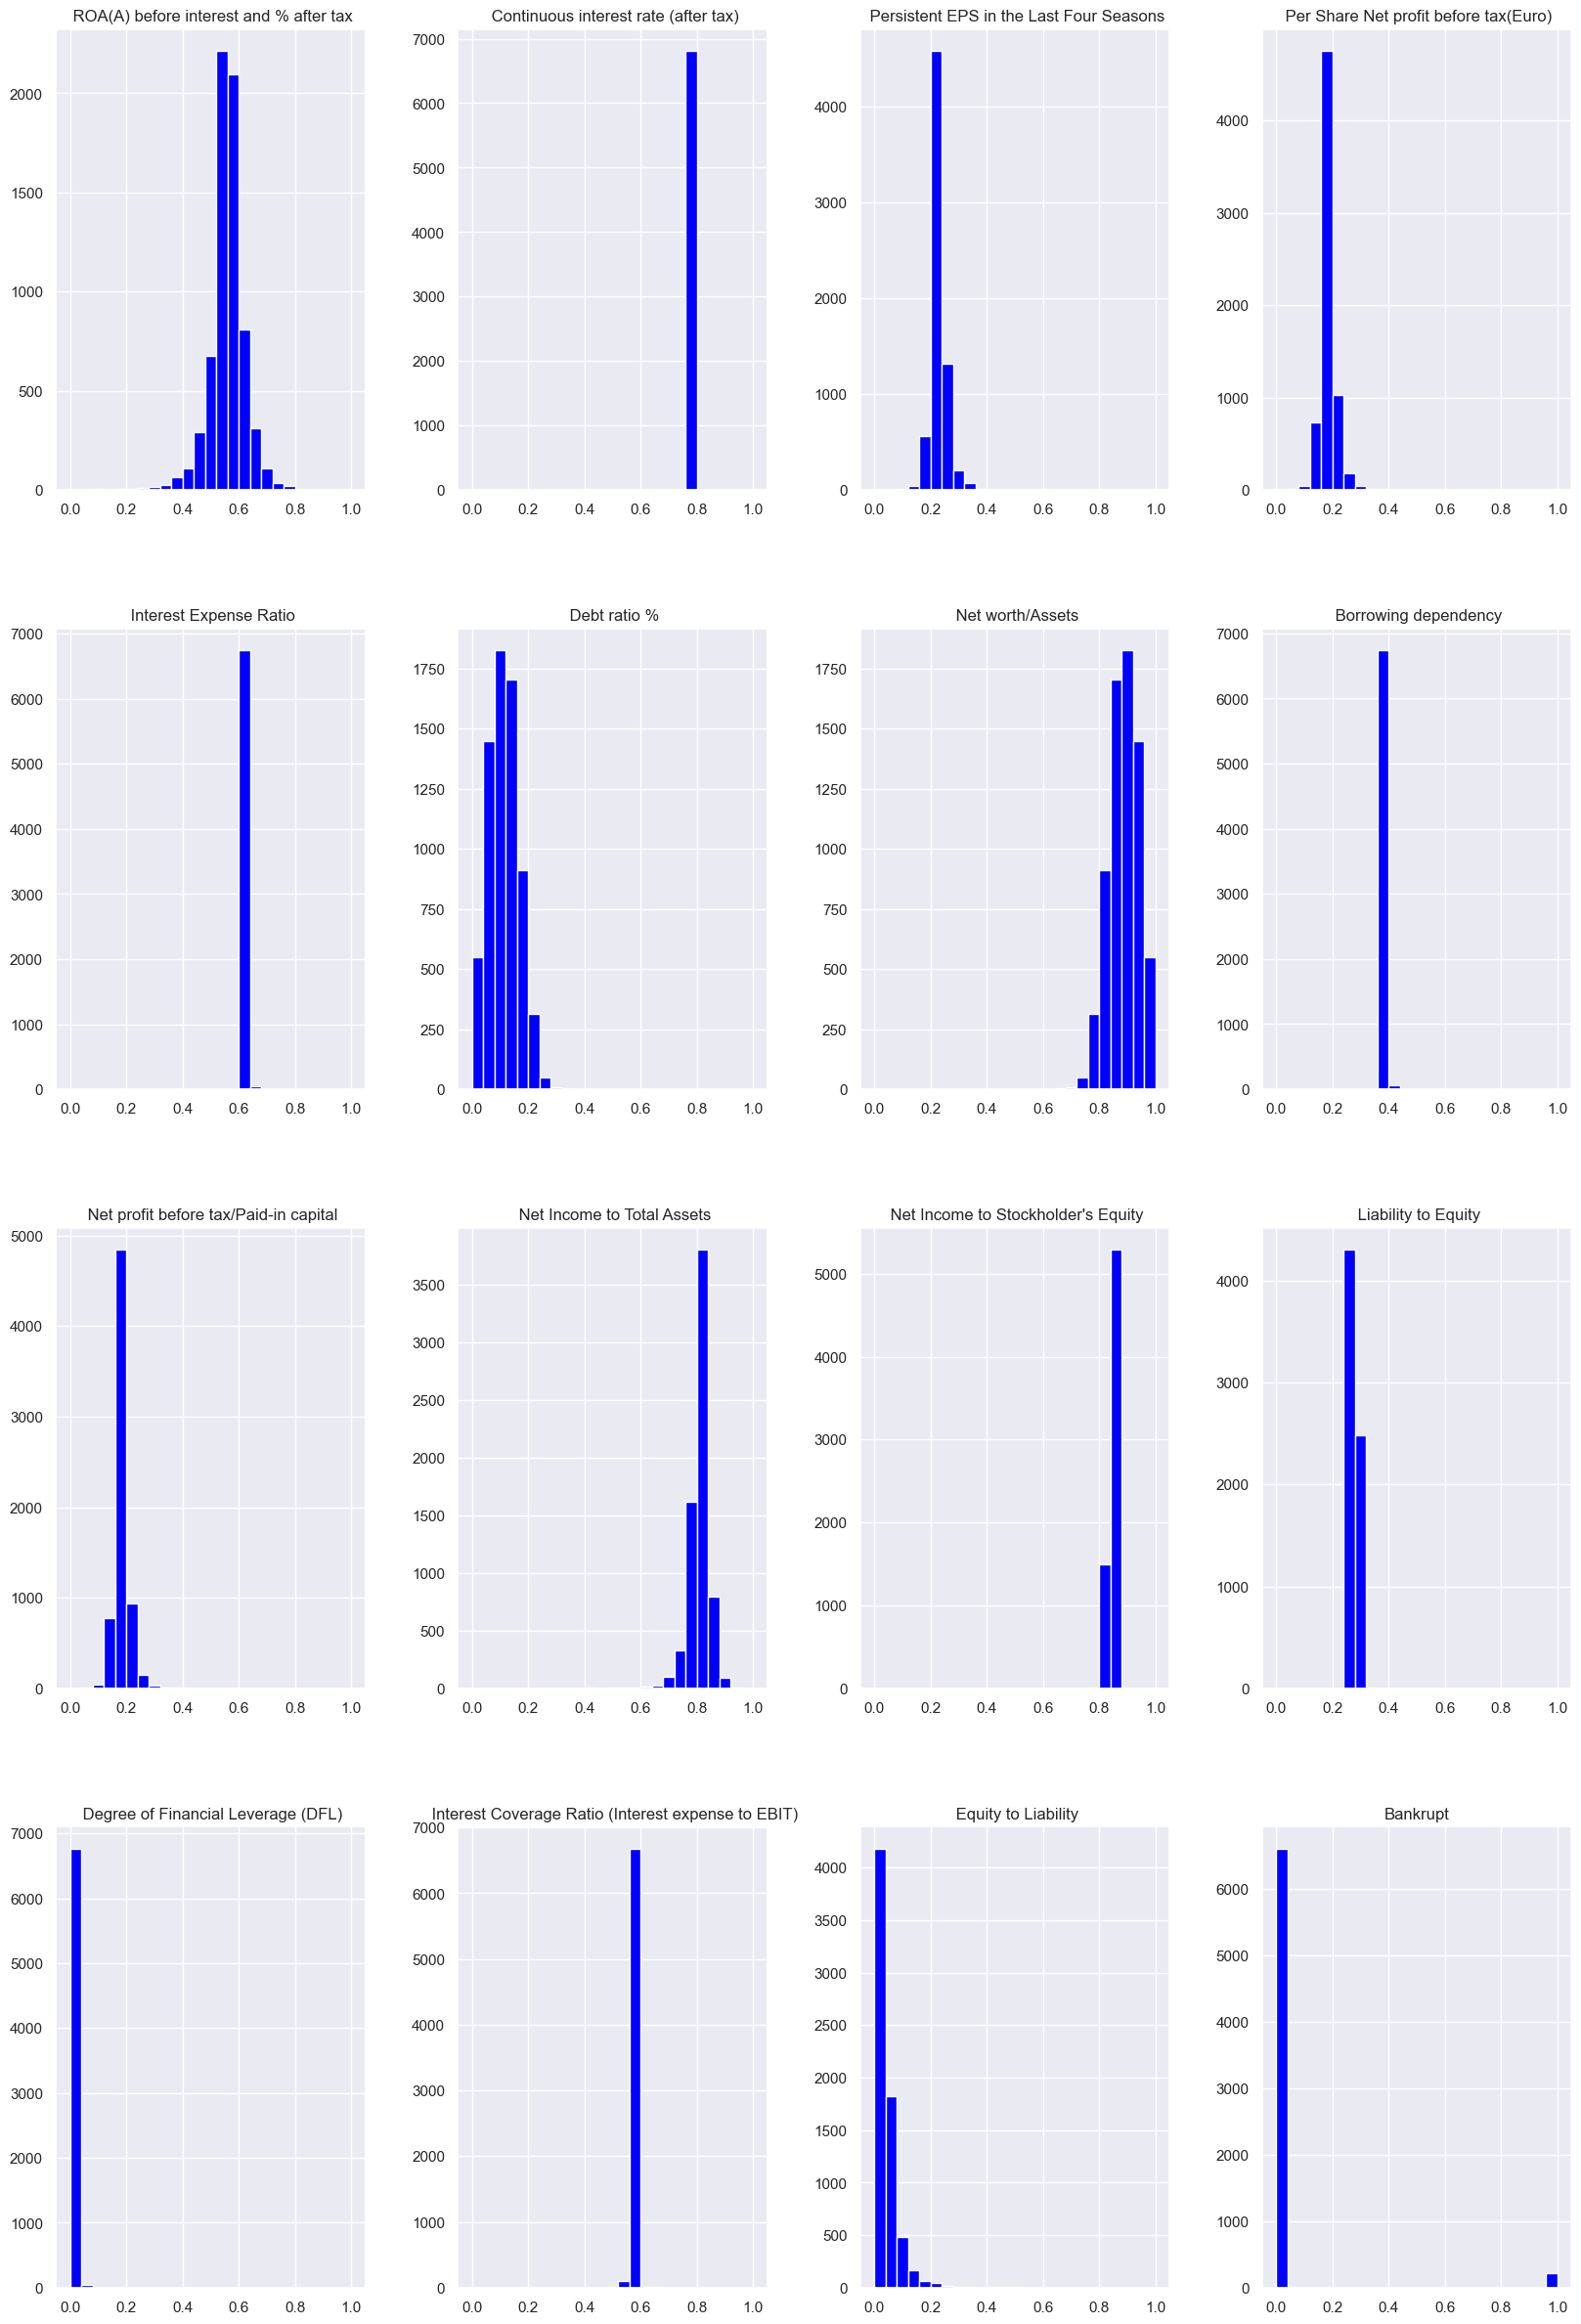

In [25]:
df2.hist(bins=25,figsize=(20,30),color='blue')
plt.show()

### Correlation

<Axes: >

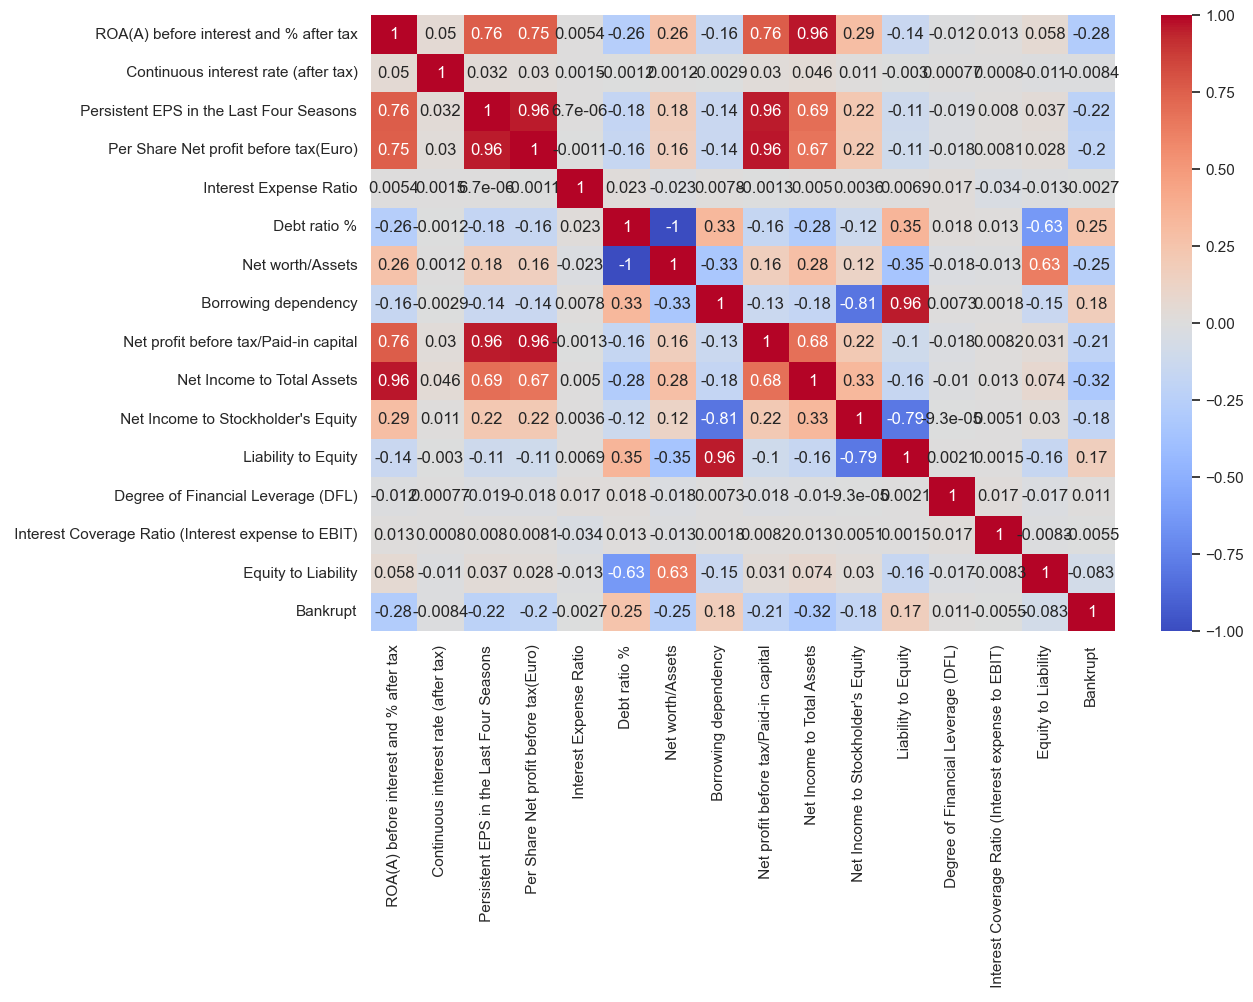

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm')

Few **key Learnings** from the correlation vizualisation heatmap above:


* **Persistent EPS in the Last Four Seasons** has a 76% correlation with **ROA(A) before interest and % after tax**, which means that as  ROA increases,persistent EPS tends to increase as well,and vice versa.
* **ROA(A) before interest and % after tax** has 96% correlation with **Net Income to Total Assets** ,this indicates how effectively the company generates profits relative to its total assets,taking into account the impact of interest depreciation ,and taxes.
* **Persistent EPS in the Last Four Seasons** has a 96% correlation with **per share Net profit before tax**,it suggests that how changes in pre-tax profits impact earnings per share,which is crucial for investors to understand the company's financial health and potential future performance.
* **Liability to Equity** has a 96% correlation with **Borrowing dependency**, It indicates that a greater proportion of liabilities relative to ,which could imply higher borrowing dependency.this Correlation highlights how the company's financing structure,particularly its reliance on borrowing,impacts its liability to equity ratio.its important for investors to assess this correlation to understand the company's financial risk and leverage levels.


#### Dropping the Highly Correlated Columns & making another dataframe 
   - we can make two different models one with Df2(All top Feature) & one with Df3 (after removing correlated column)
   - we can comapre & check which models are performing well

In [27]:
df2.columns

Index([' ROA(A) before interest and % after tax', ' Continuous interest rate (after tax)', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax(Euro)', ' Interest Expense Ratio', ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets', ' Net Income to Stockholder's Equity', ' Liability to Equity', ' Degree of Financial Leverage (DFL)', ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability', 'Bankrupt'],
      dtype='object')

In [28]:
df3=df2.drop([' ROA(A) before interest and % after tax',' Per Share Net profit before tax(Euro)',' Liability to Equity',' Net profit before tax/Paid-in capital'],axis=1)

In [29]:
df3.shape

(6819, 12)

<Axes: >

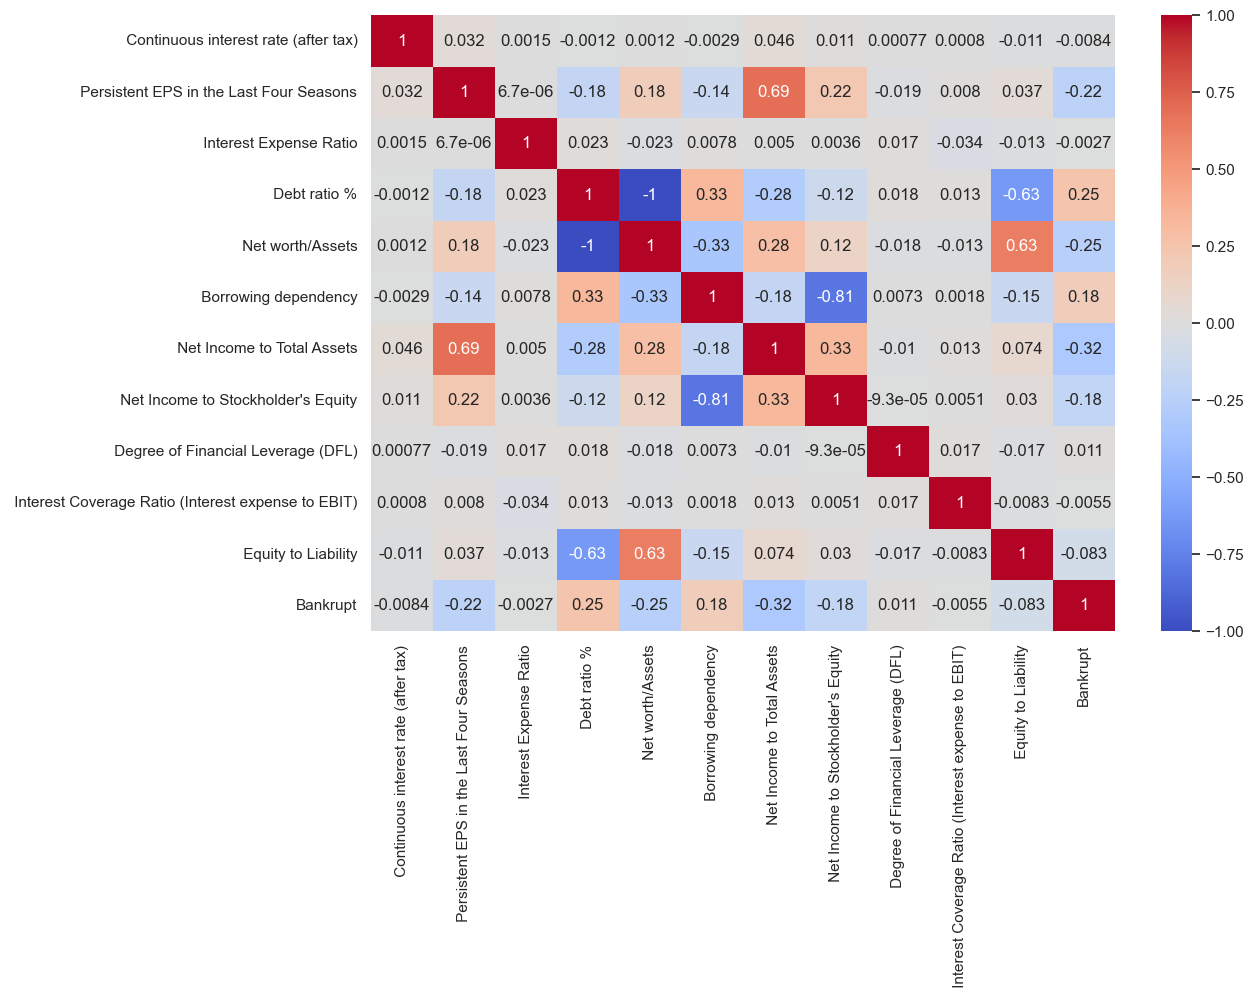

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df3.corr(),annot=True,cmap='coolwarm')

- Now we dont have any correlated columns.

# DF2

#### Balancing Data Through SMOTE

In [31]:
x1=df2.iloc[:,:-1]
y1=df2['Bankrupt']

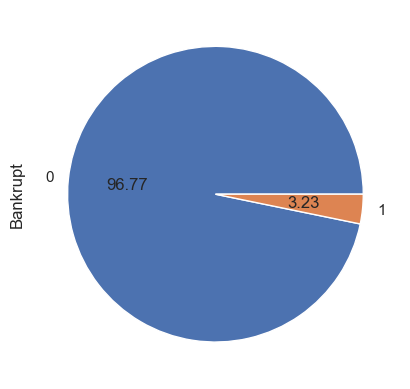

In [32]:
y1.value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x1,y1)

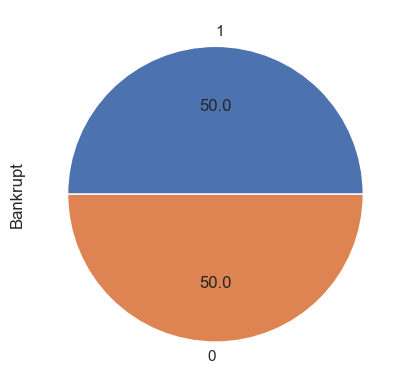

In [34]:
y_smote.value_counts().plot(kind='pie',autopct='%.1f')
plt.show()

### Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x_smote)
x_sc

array([[-0.88651195, -0.01845574, -1.12575551, ..., -0.09046364,
        -0.09935166, -0.43182594],
       [ 0.2784048 ,  0.03800145, -0.02791516, ..., 17.50458771,
         0.51284494, -0.3343258 ],
       [-0.12273272, -0.09439089, -0.8102242 , ..., -0.09385812,
        -0.13373915, -0.43170483],
       ...,
       [-0.41977222,  0.02894063, -0.89224263, ..., -0.09926755,
        -0.19846114, -0.45737496],
       [-1.31157958, -0.03921603, -1.42824835, ..., -0.08082799,
        -0.01924935, -0.47475497],
       [-0.21394717,  0.02169582, -0.39762649, ..., -0.09827829,
        -0.18508103, -0.46181923]])

### Train-Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y_smote,test_size=0.25,random_state=42)

### Model Building & Evaluation

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Logistic Regression

In [39]:
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred_train_log=log.predict(x_train)
y_pred_test_log=log.predict(x_test)

In [40]:
print(classification_report(y_test, y_pred_test_log))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1666
           1       0.87      0.90      0.88      1634

    accuracy                           0.88      3300
   macro avg       0.88      0.88      0.88      3300
weighted avg       0.88      0.88      0.88      3300



In [41]:
print('Training Accuracy',accuracy_score(y_train, y_pred_train_log))
print('********************')
print('Testing Accuracy',accuracy_score(y_test, y_pred_test_log))

Training Accuracy 0.8787633865427359
********************
Testing Accuracy 0.8818181818181818


### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_train_rf=rf.predict(x_train)
y_pred_test_rf=rf.predict(x_test)

In [44]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1666
           1       0.97      0.99      0.98      1634

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



In [45]:
print('Training Accuracy',accuracy_score(y_train, y_pred_train_rf))
print('********************')
print('Testing Accuracy',accuracy_score(y_test, y_pred_test_rf))

Training Accuracy 1.0
********************
Testing Accuracy 0.9766666666666667


## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
error_rate=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_knn=knn.predict(x_test)
    error_rate.append(np.mean(y_pred_knn!=y_test))
    

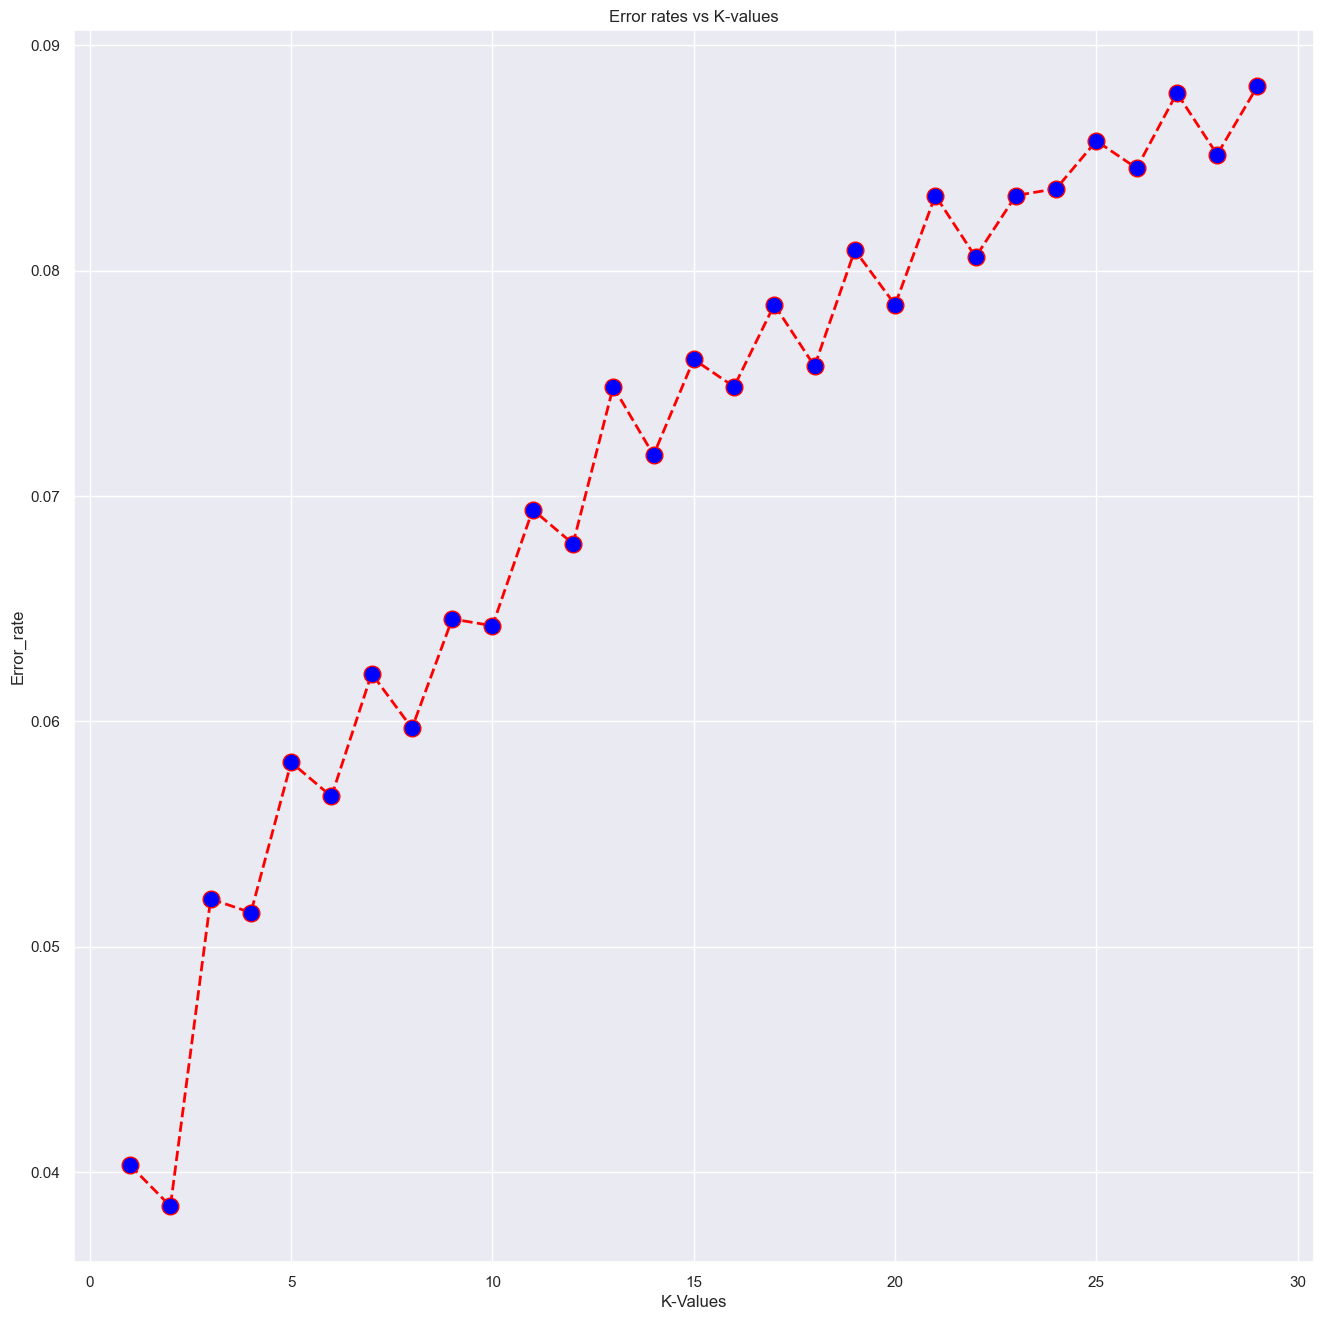

In [48]:
plt.figure(figsize=(16,16))
plt.plot(range(1,30),error_rate,color='red',linestyle='dashed', linewidth=2,markersize=12,marker='o',markerfacecolor='blue')

plt.title('Error rates vs K-values')
plt.xlabel('K-Values')
plt.ylabel('Error_rate')
plt.show()

In [49]:
knn1=KNeighborsClassifier(n_neighbors=3)
knn1.fit(x_train,y_train)
y_pred_knn_train=knn1.predict(x_train)
y_pred_knn_test=knn1.predict(x_test)

In [50]:
print('Training Accuracy',accuracy_score(y_train, y_pred_knn_train))
print('********************')
print('Testing Accuracy',accuracy_score(y_test, y_pred_knn_test))

Training Accuracy 0.9701959991917559
********************
Testing Accuracy 0.9478787878787879


## XGBooster

In [51]:
from xgboost import XGBClassifier

In [52]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_train_xgb=xgb.predict(x_train)
y_pred_test_xgb=xgb.predict(x_test)

In [53]:
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1666
           1       0.96      0.99      0.97      1634

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300



In [54]:
print("Train Accuracy" , accuracy_score(y_train, y_pred_train_xgb))
print("***************"*5)
print("Test Accuracy" , accuracy_score(y_test, y_pred_test_xgb))

Train Accuracy 0.9990907253990705
***************************************************************************
Test Accuracy 0.9736363636363636


- All the models are having acuuracy above 85% & F1 score above 0.8.
- it indicates that all the model performing well.

# DF3

In [55]:
x2=df3.iloc[:,:-1]
y2=df3['Bankrupt']

## Balancing Data Through SMOTE

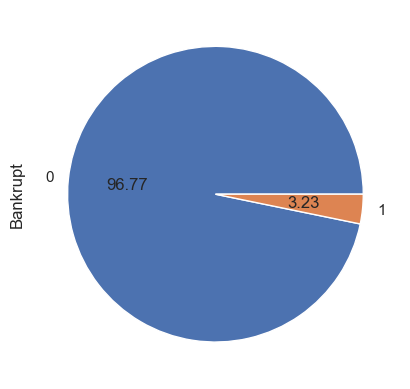

In [56]:
y2.value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [57]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x1_smote,y1_smote=smote.fit_resample(x2,y2)

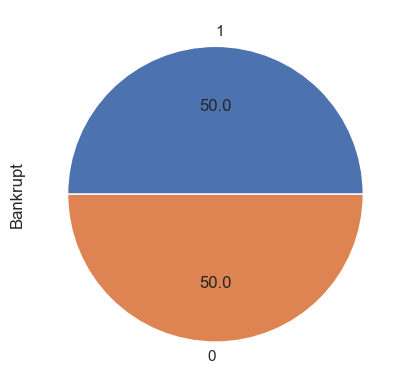

In [58]:
y1_smote.value_counts().plot(kind='pie',autopct='%.1f')
plt.show()

### Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
x_sc1=sc.fit_transform(x1_smote)
x_sc1

array([[-1.70763341e-02, -1.08067864e+00, -8.63928879e-02, ...,
        -8.18439450e-02, -9.87215230e-02, -4.27840169e-01],
       [ 3.92846221e-02, -7.64289314e-03,  4.16940194e-01, ...,
         1.82578078e+01,  5.17337550e-01, -3.30488921e-01],
       [-9.28820601e-02, -7.72276435e-01, -1.17228102e-01, ...,
        -8.53820794e-02, -1.33325971e-01, -4.27719244e-01],
       ...,
       [ 1.66003775e-02, -2.86208898e-01, -9.98578731e-02, ...,
        -7.60019677e-02, -4.94802484e-02, -2.26407015e-01],
       [ 1.07699255e-02, -8.01925428e-01, -1.59009527e-01, ...,
        -9.14369300e-02, -2.05878623e-01, -4.78894057e-01],
       [ 2.20669805e-03, -4.35923455e-01, -8.82960195e-02, ...,
        -8.16782971e-02, -1.04402255e-01, -2.71507032e-01]])

### Train-Test Split

In [60]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_sc1,y1_smote,test_size=0.25,random_state=42)

### Logistic Regression

In [61]:
log1=LogisticRegression()
log1.fit(x1_train,y1_train)
y_pred_train_log1=log1.predict(x1_train)
y_pred_test_log1=log1.predict(x1_test)

In [62]:
print(classification_report(y_test, y_pred_test_log1))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1666
           1       0.86      0.87      0.87      1634

    accuracy                           0.87      3300
   macro avg       0.87      0.87      0.87      3300
weighted avg       0.87      0.87      0.87      3300



In [63]:
print('Training Accuracy',accuracy_score(y1_train, y_pred_train_log1))
print('********************')
print('Testing Accuracy',accuracy_score(y1_test, y_pred_test_log1))

Training Accuracy 0.8818953323903819
********************
Testing Accuracy 0.8672727272727273


### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf1=RandomForestClassifier()
rf1.fit(x1_train,y1_train)
y_pred_train_rf1=rf1.predict(x1_train)
y_pred_test_rf1=rf1.predict(x1_test)

In [66]:
print(classification_report(y1_test, y_pred_test_rf1))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1666
           1       0.96      0.98      0.97      1634

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300



In [67]:
print('Training Accuracy',accuracy_score(y1_train, y_pred_train_rf1))
print('********************')
print('Testing Accuracy',accuracy_score(y1_test, y_pred_test_rf1))

Training Accuracy 1.0
********************
Testing Accuracy 0.9709090909090909


### KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
error_rate1=[]

for i in range(1,30):
    knn_n=KNeighborsClassifier(n_neighbors=i)
    knn_n.fit(x1_train,y1_train)
    y_pred_knn_n=knn_n.predict(x1_test)
    error_rate1.append(np.mean(y_pred_knn_n!=y1_test))
    

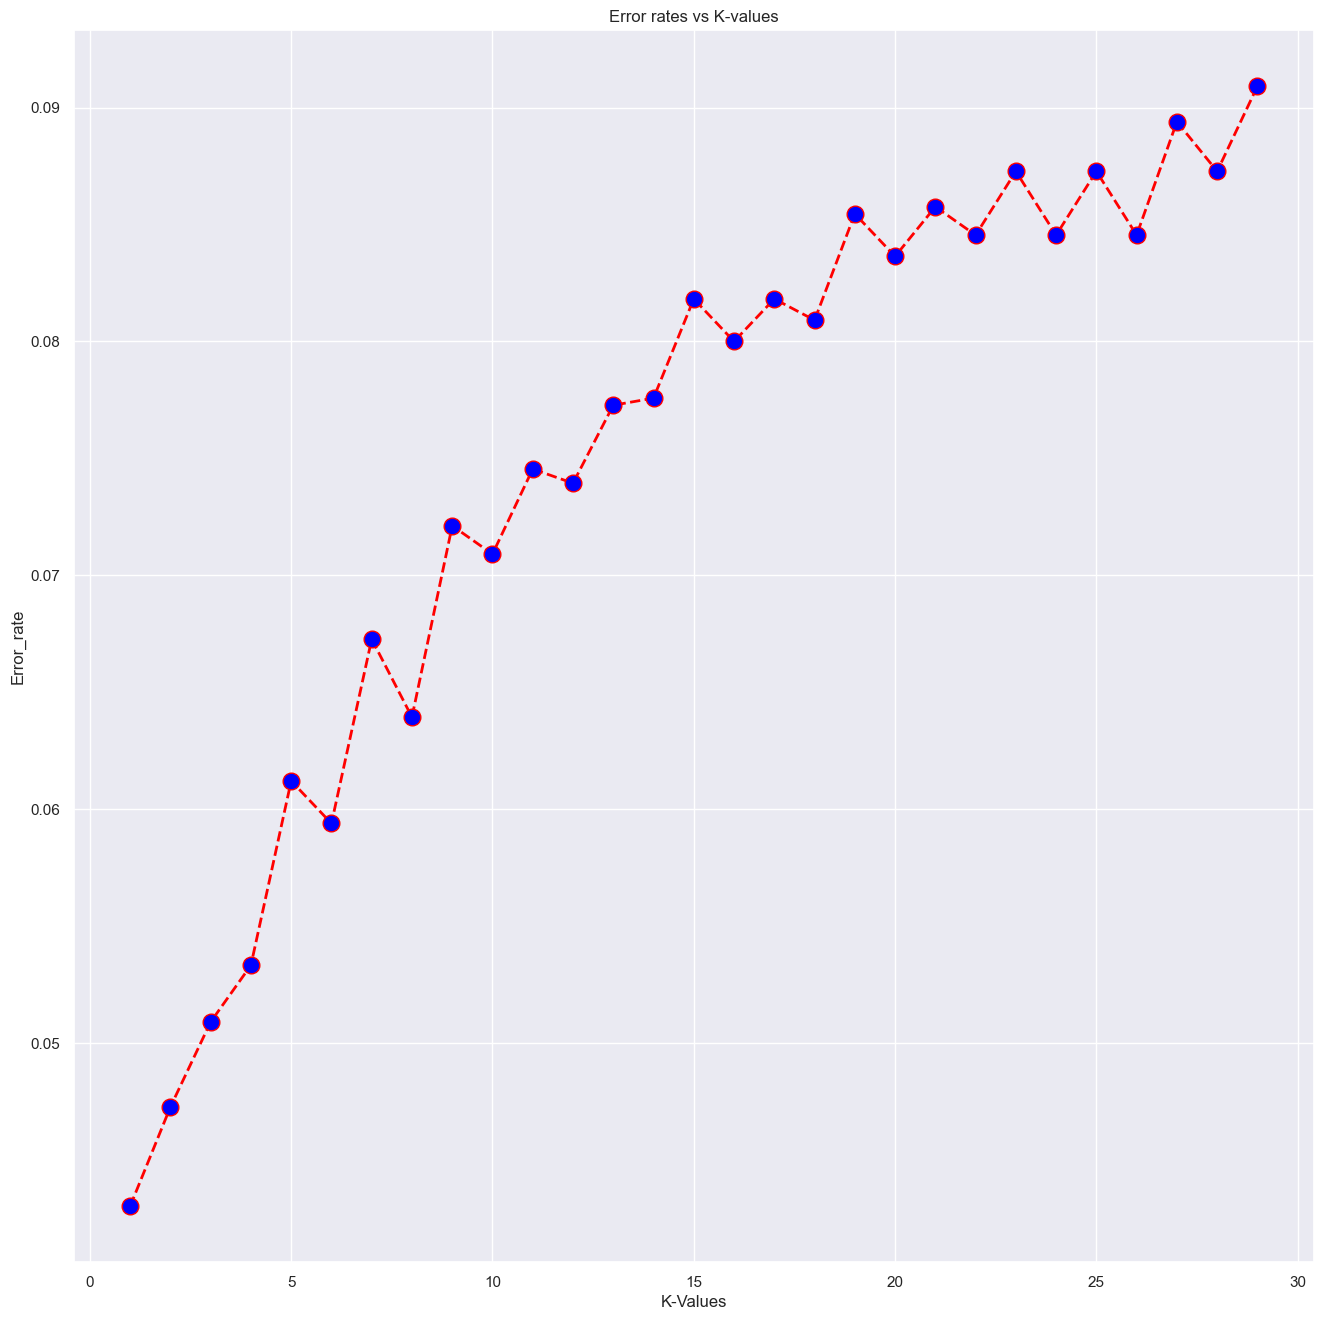

In [70]:
plt.figure(figsize=(16,16))
plt.plot(range(1,30),error_rate1,color='red',linestyle='dashed', linewidth=2,markersize=12,marker='o',markerfacecolor='blue')

plt.title('Error rates vs K-values')
plt.xlabel('K-Values')
plt.ylabel('Error_rate')
plt.show()

In [71]:
knn2=KNeighborsClassifier(n_neighbors=3)
knn2.fit(x1_train,y1_train)
y_pred_knn2_train=knn2.predict(x1_train)
y_pred_knn2_test=knn2.predict(x1_test)

In [72]:
print(classification_report(y1_test, y_pred_knn2_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1666
           1       0.92      0.98      0.95      1634

    accuracy                           0.95      3300
   macro avg       0.95      0.95      0.95      3300
weighted avg       0.95      0.95      0.95      3300



In [73]:
print('Training Accuracy',accuracy_score(y1_train, y_pred_knn2_train))
print('********************')
print('Testing Accuracy',accuracy_score(y1_test, y_pred_knn2_test))

Training Accuracy 0.9709032127702566
********************
Testing Accuracy 0.9490909090909091


### XGBooster

In [74]:
from xgboost import XGBClassifier

In [75]:
xgb=XGBClassifier()
xgb.fit(x1_train,y1_train)
y_pred_train_xgb1=xgb.predict(x1_train)
y_pred_test_xgb1=xgb.predict(x1_test)

In [76]:
print(classification_report(y1_test, y_pred_test_xgb1))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1666
           1       0.96      0.98      0.97      1634

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300



In [77]:
print("Train Accuracy" , accuracy_score(y1_train, y_pred_train_xgb1))
print("***************"*5)
print("Test Accuracy" , accuracy_score(y1_test, y_pred_test_xgb1))

Train Accuracy 0.9978783592644979
***************************************************************************
Test Accuracy 0.9690909090909091


- All the models are having acuuracy above 85% & F1 score above 0.8.
- it indicates that all the model performing well.

## Comments:
    
* We have build models with two approaches:
   -  one with Df2(All top Feature) 
   -  one with Df3 (after removing correlated column)
   

* **We found that  both models  have good accuracy .**
* **We can consider models as per any models.**

* Most models have very high Accuracy, all over 90%.
* However, the model with the highest Accuracy is Random Forest(acc = 97%) & XGBooster (acc = 97%).
* Therefore, we choose these model to conduct forecasting.

## Conclusion:

### In this analysis, some important results were found as follows:

* The topic uses Machine Learning models to come up with the best model for predicting bankruptcy at companies.
* The best model given is the XGBooster Model & Random forest.
* The accuracy of the Random forest model is 97.3%. 
* The accuracy of the XGBooster model is 97.19%. 

 **Top 15 features for Bankruptcy given by mutual info classif:**
-  ROA(A) before interest and % after tax
-  Continuous interest rate (after tax)
-  Persistent EPS in the Last Four Seasons
-  Per Share Net profit before tax(Euro)
-  Interest Expense Ratio
-  Debt ratio %
-  Net worth/Assets
-  Borrowing dependency
-  Net profit before tax/Paid-in capital
-  Net Income to Total Assets
-  Net Income to Stockholder's Equity'
-  Liability to Equity
-  Degree of Financial Leverage (DFL)
-  Interest Coverage Ratio (Interest expense to EBIT)
-  Equity to Liability
      

## Suggestion:

- Forecasts of corporate default are used in various sectors across the economy. Corporations can diagnose their current condition based on predictive models and establish their strategies. Executives can run their businesses more stably by managing key metrics that influence a company's default risk. Investors can modify their strategies and improve their portfolios by checking the company's likelihood of default.
- Additionally, governments can establish macroprudential policies and improve related financial regulations using corporate default predictions. In these ways, default prediction models help design and improve financial systems. 
- Additionally, using machine learning algorithms and statistical models, corporate default predictions are at the forefront of advanced financial engineering. The recent global financial crisis and the increase in credit risk have further highlighted the importance of this sector. Because of their importance, corporate default predictions have been widely studied.


**In short, building a model to predict default risk (or bankruptcy risk) is very important for every business. Therefore, when undertaking corporate default forecasting, it is necessary to choose an appropriate method that can provide appropriate information for forecasting purposes, which requires a thorough understanding of the appropriate use of each method.**



# Thannk You........